{+1, -1}！千万别{+1,0}

## Exercise 1.10

Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1000 fair coins. Flip each coin independently times. Let's focus on 3 coins as follows: $c_1$ is the first coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie) . Let $v_1$ , $v_{rand}$ and $v_{min}$ be the fraction of heads you obtain for the respective three coins.

In [ ]:
import numpy as np

In [ ]:
# n_coins枚硬币投f_times次
def get_coins(n_coins, f_times):
    coins = np.zeros((n_coins, f_times))
    mini_index = -1

    # 1 is heads, 0 is back 
    for i in range(n_coins):
        coins[i] = np.random.randint(0, 2, size=f_times)

    coins_sum = coins.sum(axis=1)
    mini_sum = coins_sum[0]
    # get cmin
    for i in range(1, n_coins):
        if(coins_sum[i] < mini_sum):
            mini_sum = coins_sum[i]
            mini_index = i
    # 返回硬币和正面朝上最少硬币的索引
    return coins, mini_index

In [ ]:
coins, mini_index = get_coins(1000, 10)

In [ ]:
c1 = coins[0]
c_rand = coins[np.random.randint(0, 1000)]
c_min = coins[mini_index]
print("c1 = ", c1)
print("c_rand = ", c_rand)
print("c_min = ", c_min)
print("mini_index", mini_index)

In [ ]:
# the fraction of heads
v1 = c1.sum() / 10
v_rand = c_rand.sum() / 10
v_min = c_min.sum() / 10
print("v1 = ", v1)
print("v_rand = ", v_rand)
print("v_min = ", v_min)

-----

(a) What is μ for the three coins selected?

抛一枚硬币正反面概率都为$\frac{1}{2}$

---

(b) Repeat this entire experiment a large number of times (e.g., 100,000 runs of the entire experiment) to get several instances of $v_1$ , $v_{rand}$ and $v_{min}$ and plot the histograms of the distributions of $v_1$ , $v_{rand}$ and $v_{min}$. Notice that which coins end up being $c_{rand}$ and $c_{min}$ may differ from one run to another.

In [ ]:
v1_h = []
v_rand_h = []
v_min_h = []
for i in range(100000):
    coins, mini_index = get_coins(1000, 10)
    v1_h.append(coins[0].sum() / 10)
    v_rand_h.append(coins[np.random.randint(0, 1000)].sum() / 10)
    v_min_h.append(coins[mini_index].sum() / 10)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(v1_h)
plt.title("the distribution of v1")

In [ ]:
plt.hist(v_rand_h)
plt.title("the distribution of v_rand")

In [ ]:
plt.hist(v_min_h)
plt.title("the distribution of v_min")

---

(c) Using (b), plot estimates for $P[|v-u|>\epsilon]$ as a function of $\epsilon$, together with the Hoeffding bound $2e^{-2\epsilon^2 N}$ (on the same graph)

In [ ]:
v1_h = np.asarray(v1_h)
v_rand_h = np.asarray(v_rand_h)
v_min_h = np.asarray(v_min_h)

In [ ]:
n = 100000
epsilon = np.arange(0, 1, 0.001)
Hoeffding_bound = 2 * np.exp(-2 * epsilon**2 * 10)
p_v1 = []
p_vrand = []
p_vmin = []
for i in range(len(epsilon)):
    p_v1.append((abs(v1_h - 0.5) > epsilon[i]).sum() / n)
    p_vrand.append((abs(v_rand_h - 0.5) > epsilon[i]).sum() / n)
    p_vmin.append((abs(v_min_h - 0.5) > epsilon[i]).sum() / n)

In [ ]:
plt.plot(epsilon, Hoeffding_bound, label='Hoeffding_bound')
plt.ylim((0, 1))
plt.plot(epsilon, p_v1, label='P[v1-u>$\epsilon$]')
plt.plot(epsilon, p_vrand, label='P[vrand-u>$\epsilon$]')
plt.plot(epsilon, p_vmin, label='P[vmin-u]>$\epsilon$]')
plt.xlabel('epsilon')
plt.ylabel('P')
plt.legend()

---

(d) Which coins obey the Hoeffding bound , and which ones do not? Explain why.

有(c)图可看出，$v_1$和$v_{rand}$ 符合Hoeffding bound, $v_{min}$不符合。

---

(e) Relate part (d) to the multiple bins in Figure 1.10.

+ $c_1$表示选择第一个硬币，$c_{rand}$表示随机选择一个硬币，$c_{min}$表示选择抛10次都是反面的硬币。
+ 1000个硬币抛十次可以看做，有1000个箱子，每个箱子代表一个硬币。每一个抛硬币结果可以看成箱子里的弹珠。每个硬币抛十次可以看成从箱子里采样10个弹珠。
+ v就代表采样十次即某一枚硬币抛十次正面的频率。$v_1$就代表第一枚硬币正面朝上的频率，$v_{rand}$就代表第随机数枚硬币正面朝上的频率。$v_{mini}$代表1000枚硬币抛10次正面朝上的最小频率。
+ 因为3枚硬币正面朝上的概率都为0.5, 所以$u=0.5$，表示从这三枚硬币表示的箱子里，再采样一次得到的正面频率为0.5

---

---

## Problem 1 .1

We have 2 opaque bags, each containing 2 balls. One bag has 2 black balls and the other has a black and a white ball . You pick a bag at random and then pick one of the balls in that bag at random. When you look at the ball it is black. You now pick the second ball from that same bag. What is the probability that this ball is also black? {Hint: Use Bayes' Theorem: $\Bbb P[A \ and \ B] = \Bbb P[A\ |\ B] \ \Bbb P[B]=\Bbb P[B\ |\ A] \ \Bbb P[A]$

事件A：取第一个球为黑色
事件B：取第二个球为黑色
$P[B|A]=\frac{P[AB]}{P[A]} = \frac{0.5}{0.5+0.5 \cdot 0.5} = \frac 23$

---

---

## Problem 1.2

Consider the perceptron in two dimensions: $h(x)=sign(w^Tx)$ where $w=[w_0, w_1, w_2]^T$ and $x=[1, x_1,x_2]^2$. Technically, $x$ has three coordinates, but we call this perceptron two-dimensional because the first coordinate is fixed at 1.

(a)Show that the regions on the plane where $h(x) = + 1$ and $h(x) = - 1$ are separated by a line. If we express this line by the equation $x_2 = ax_1 + b$, what are the slope a and intercept b in terms of $w_0,w_1,w_2$?

$$w^Tx=0 \\w_0+w_1x_1+w_2x_2=0 \\ x_2=-\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}$$
所以：
$$
\begin{split}
a &= \frac{w_1}{w_2} \\
b &= \frac{w_0}{w_2} \\
\end{split}
$$

---

(b)Draw a picture for the cases $w = [1,2,3]^T$ and $w = -[1,2,3]^T$

In [ ]:
import matplotlib.pyplot as plt

x1 = np.arange(-6, 6, 2)
x2_p = np.array([-2/3*i-1/3 for i in x1])
x2_n = np.array([-2/3*i-1/3 for i in x1])
plt.plot(x1, x2_p, label='$w=[1,2,3]^T$')
plt.plot(x1, x2_n, label='$w=-[1,2,3]^T$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
plt.legend()

In more than two dimensions, the $+1$ and $-1$ regions are separated by a hyperplane, the generalization of a line.

---

---

## Problem 1.3

Prove that the PLA eventually converges to a linear separator for separable data. The following steps will guide you through the proof. Let $w^*$ be an optimal set of weights (one which separates the data). The essential idea in this proof is to show that the PLA weights $w(t)$ get "more aligned" with $w^*$ with every iteration. For simplicity, assume that $w(0) = 0$.

(a)Let $\rho = \min_{1\leq n\leq N} y_n (w^{*T}x_n)$ . Show that $\rho > 0$.

因为$w^*$是最理想的权重集，因此对于N个点中的任何一个点，用$w^*$权重都能正确分类，所以能得到$\rho > 0$

---

(b)Show that $w^T(t)w^* \geq w^T(t-1)w^*+\rho$, and conclude that $w^T(t)w^* \geq t\rho$

 $$
 \begin{aligned}
 w^T(t)w^* &= (w^T(t-1)+y(t-1)x^T(t-1))w^* \\
 &= w^T(t-1)w^* +y(t-1)x^T(t-1)w^* \\
 &\geq w^T(t-1)w^* + \min_{1\leq n\leq N} y_n (w^{*T}x_n) \\
 &\geq w^T(t-1)w^* + \rho \\
 &\geq w^T(t-2)w^* + 2\rho \\
 &... \\
 &\geq t\rho
 \end{aligned}
 $$ 

---

(c)Show that $||w(t)||^2 \leq ||w(t-1)||^2 + ||x(t-1)||^2$

$$
\begin{aligned}
||w(t)||^2 &= ||w(t-1)+y(t-1)x(t-1)||^2 \\
&= ||w(t-1)||^2 + 2y(t-1)w^T(t-1)x(t-1) + ||y(t-1)x(t-1)||^2 \\
& \leq ||w(t-1)||^2 + ||y(t-1)x(t-1)||^2 \\
& \leq ||w(t-1)||^2 + ||x(t-1)||^2
\end{aligned}
$$

---

(d)Show by induction that $||w(t)||^2 \leq tR^2$, where $R=\max_{1\leq n\leq N}||x_n||$

$$
\begin{aligned}
||w(t)||^2 &\leq ||w(t-1)||^2 + ||x(t-1)||^2 \\
& \leq ||w(t-1)||^2 + \max_{1\leq n\leq N}||x_n|| \\
& \leq ||w(t-2)||^2 + 2\max_{1\leq n\leq N}||x_n|| \\
... \\
& \leq |w(0)|^2 + t\max_{1\leq n\leq N}||x_n|| = tR^2
\end{aligned}
$$

---

(e)Using (b) and (d), show that $$\frac{w^T(t)}{||w(t)||} w^* \geq \sqrt{t} \cdot \frac{\rho}{R},$$  
and hence prove that $$t \leq \frac{R^2||w^*||^2}{\rho^2}$$

因为：
$$\frac{w^T(t) w^*}{||w(t)||||w^*||} = \cos \alpha \leq 1$$
($\alpha$是$w(t)$和$w^*$的夹角)  
所以由(b)、(d)和上式得：
$$
\frac{w^T(t) w^*}{||w(t)||||w^*||} \geq \frac{t\rho}{\sqrt{t}{R||w^*||}} = \sqrt{t} \cdot \frac{\rho}{R||w^*||} \\
\frac{w^T(t)}{||w(t)||} w^* \geq \sqrt{t} \cdot \frac{\rho}{R} \\
\sqrt{t} \cdot \frac{\rho}{R||w^*||} \leq 1 \\
t \leq \frac{R^2||w^*||^2}{\rho^2}
$$

In practice, PLA converges more quickly than the bound $\frac{R^2||w^*||^2}{\rho^2}$ suggests. Nevertheless, because we do not know $\rho$ in advance, we can't determine the number of iterations to convergence, which does pose a problem if the data is non-separable.

---

---

## Problem 1 .4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# construct target fuction
wf = [-1, 1, 1]

(a) Generate a linearly separable data set of size 20 as indicated in Exercise1.4. Plot the examples {(xn,Yn)} as well as the target function f on a plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot.

In [ ]:
# generate data set of size 20
x = np.random.rand(20, 3)
x[:, 0] = 1
y = []
for i in range(x.shape[0]):
    if (np.dot(wf[:], x[i]) > 0):
        y.append(1)
    else:
        y.append(-1)
        
# postive points and negative points
postive_index = []
negtive_index = []
for i in range(len(y)):
    if y[i] > 0:
        postive_index.append(i)
    else:
        negtive_index.append(i)
postive_x = x[postive_index]
negtive_x = x[negtive_index]

In [ ]:
plt.plot(postive_x[:, 1], postive_x[:, 2], 'bo', label='postive points')
plt.plot(negtive_x[:, 1], negtive_x[:, 2], 'bx', label='negtive points')
plt.plot([1, 0], [0, 1], label='target function f')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

----------------------------------------------------------------------

(b)Run the perceptron learning a lgorithm on the data set above. Report the number of updates that the algorithm takes before converging. Plot the examples {(xn,Yn)}, the target function f, and the final hypothesis g in the same figure. Comment on whether f is close to g.

In [ ]:
# run perceptron learning algorithm
def PLA(x, y):
    w = [0, 0, 0]
    n_iter = 0
    while 1:
        flag = 0
        for i in range(x.shape[0]):
            if(y[i] * (np.dot(w, x[i])) <= 0):
                n_iter += 1
                flag = 1
                w += y[i] * x[i]
        if flag == 0:
            break

    return (w, n_iter)

In [ ]:
w_b, n_iter_b = PLA(x, y)

In [ ]:
print("iteration number: ", n_iter_b)

In [ ]:
# 对PLA计算出的直线取两点(0,g0), (1, g1)
g0_b = -(w_b[0] + w_b[1] * 0) / w_b[2]
g1_b = -(w_b[0] + w_b[1] * 1) / w_b[2]

In [ ]:
plt.plot([0, 1], [g0_b, g1_b], label='final hypothesis g')
plt.plot([1, 0], [0, 1], label='tatget function f')
plt.plot(postive_x[:, 1], postive_x[:, 2], 'bo', label='postive points')
plt.plot(negtive_x[:, 1], negtive_x[:, 2], 'bx', label='negtive points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

--------------------------------------

(c) Repeat everything in (b) with another randomly generated data set of size 20. Compare your resu lts with (b ).

In [ ]:
# generate another data set of size 20
x = np.random.rand(20, 3)
x[:, 0] = 1
y = []
for i in range(x.shape[0]):
    if (np.dot(wf[:], x[i]) > 0):
        y.append(1)
    else:
        y.append(-1)
        
# postive points and negative points
postive_index = []
negtive_index = []
for i in range(len(y)):
    if y[i] > 0:
        postive_index.append(i)
    else:
        negtive_index.append(i)
postive_x = x[postive_index]
negtive_x = x[negtive_index]

In [ ]:
w_c, n_iter_c = PLA(x, y)

In [ ]:
# iteration number
print('n_iter = ', n_iter_c)

In [ ]:
# 对PLA计算出的直线取两点(0,g0), (1, g1)
g0_c = -(w_c[0] + w_c[1] * 0) / w_c[2]
g1_c = -(w_c[0] + w_c[1] * 1) / w_c[2]

# 比较图
plt.plot([0, 1], [g0_c, g1_c], label='final hypothesis g')
plt.plot([1, 0], [0, 1], label='tatget function f')
plt.plot(postive_x[:, 1], postive_x[:, 2], 'bo', label='postive points')
plt.plot(negtive_x[:, 1], negtive_x[:, 2], 'bx', label='negtive points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

-----

(d)Repeat everyth i ng i n (b) with a nother ra ndomly generated data set of
size 100. Com pare you r resu lts with (b).

In [ ]:
# generate another data set of size 100
x = np.random.rand(100, 3)
x[:, 0] = 1
y = []
for i in range(x.shape[0]):
    if (np.dot(wf[:], x[i]) > 0):
        y.append(1)
    else:
        y.append(-1)
        
# postive points and negative points
postive_index = []
negtive_index = []
for i in range(len(y)):
    if y[i] > 0:
        postive_index.append(i)
    else:
        negtive_index.append(i)
postive_x = x[postive_index]
negtive_x = x[negtive_index]

In [ ]:
w_d, n_iter_d = PLA(x, y)

In [ ]:
# iteration number
print('n_iter = ', n_iter_d)

In [ ]:
# 对PLA计算出的直线取两点(0,g0), (1, g1)
g0_d = -(w_d[0] + w_d[1] * 0) / w_d[2]
g1_d = -(w_d[0] + w_d[1] * 1) / w_d[2]

# 比较图
plt.plot([0, 1], [g0_d, g1_d], label='final hypothesis g')
plt.plot([1, 0], [0, 1], label='tatget function f')
plt.plot(postive_x[:, 1], postive_x[:, 2], 'bo', label='postive points')
plt.plot(negtive_x[:, 1], negtive_x[:, 2], 'bx', label='negtive points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

---

(e) Repeat everything in (b) with another randomly generated data set of size 1000. Compare your resu lts with (b).

In [ ]:
# generate another data set of size 20
x = np.random.rand(1000, 3)
x[:, 0] = 1
y = []
for i in range(x.shape[0]):
    if (np.dot(wf[:], x[i]) > 0):
        y.append(1)
    else:
        y.append(-1)
        
# postive points and negative points
postive_index = []
negtive_index = []
for i in range(len(y)):
    if y[i] > 0:
        postive_index.append(i)
    else:
        negtive_index.append(i)
postive_x = x[postive_index]
negtive_x = x[negtive_index]

In [ ]:
w_e, n_iter_e = PLA(x, y)

In [ ]:
# iteration number
print('n_iter = ', n_iter_e)

In [ ]:
# 对PLA计算出的直线取两点(0,g0), (1, g1)
g0_e = -(w_e[0] + w_e[1] * 0) / w_e[2]
g1_e = -(w_e[0] + w_e[1] * 1) / w_e[2]

# 比较图
plt.plot([0, 1], [g0_e, g1_e], label='final hypothesis g')
plt.plot([1, 0], [0, 1], label='tatget function f')
plt.plot(postive_x[:, 1], postive_x[:, 2], 'bo', label='postive points')
plt.plot(negtive_x[:, 1], negtive_x[:, 2], 'bx', label='negtive points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

-----

(f) Modify the algorithm such that it takes $X_n \in R^{10}$ instead of $R^2$. Randomly generate a linearly separable data set of size 1000 with $X_n \in R^{10} $ and feed the data set to the algorithm. How many updates does the algorithm take to converge?

In [ ]:
# run perceptron learning algorithm
def PLA_10d(x, y):
    w = [0] * 11
    n_iter = 0
    while 1:
        flag = 0
        for i in range(x.shape[0]):
            if(y[i] * (np.dot(w, x[i])) <= 0):
                n_iter += 1
                flag = 1
                w += y[i] * x[i]
        if flag == 0:
            break
    return (w, n_iter)

In [ ]:
wf_10d = [1] * 11
# generate another data set of size 20
x = np.random.randn(1000, 11)
x[:, 0] = 1
y = []
for i in range(x.shape[0]):
    if (np.dot(wf_10d[:], x[i]) > 0):
        y.append(1)
    else:
        y.append(-1)
        
# postive points and negative points
postive_index = []
negtive_index = []
for i in range(len(y)):
    if y[i] > 0:
        postive_index.append(i)
    else:
        negtive_index.append(i)
postive_x = x[postive_index]
negtive_x = x[negtive_index]

In [ ]:
w_f, n_iter_f = PLA_10d(x, y)

In [ ]:
print("iteration: ", n_iter_f)

----

(g) Repeat the algorithm on the same data set as (f) for 100 experiments. In the iterations of each experiment, pick x(t) randomly instead of deterministically. Plot a histogram for the number of updates that the algorithm takes to converge.

In [ ]:
# run perceptron learning algorithm
def PLA_10d_random(x, y):
    w = [0] * 11
    n_iter = 0
    while 1:
        flag = 0
        for i in np.random.randint(0, 1000, size=1000):
            if(y[i] * (np.dot(w, x[i])) <= 0):
                n_iter += 1
                flag = 1
                w += y[i] * x[i]
        if flag == 0:
            break
    return (w, n_iter)

In [ ]:
# 100 experiments
iter_history = []
for i in range(100):
    _, n_inter_g = PLA_10d_random(x, y)
    iter_history.append(n_inter_g)

In [ ]:
plt.hist(iter_history)

----

(h) Summarize your conclusions with respect to accuracy and running time as a function of N and d.

N越多，跑的时间越长，离target function也越准确。
d越高，跑的时间越长。

---

---

## Problem 1.5

The perceptron learning algorithm works like this: In each iteration, pick a random $(x(t),y(t))$ and compute the 'signal' $s(t)=w^T(t)x(t)$. If $y(t) \cdot s(t) \leq 0$, update $w$ by 
$$w(t+1) \leftarrow w(t) + y(t) \cdot x(t);$$
One may argue that this algorithm does not take the 'closeness' between $s(t)$ and $y(t)$ into consideration. Let's look at another perceptron learning algorithm: In each iteration, pick a random $(x(t),y(t))$ and compute $s(t)$. If $y(t)\cdot x(t) \leq 1$, update $w$ by
$$w(t+1) \leftarrow w(t) + \eta(y(t)-s(t)) \cdot x(t);$$
where $\eta$ is a constant. That is, if $s(t)$ agrees with $y(t)$ well (their product is > 1), the algorithm does nothing. On the other hand, if $s(t)$ is further from  $y(t)$, the algorithm changes $w(t)$ more. In this problem , you are asked to implement this algorithm and study its perfrmance.

---

(a)Generate a training data set of size 100 similar to that used in Exercise 1.4.Generate a test data set of size 10,000 from the same process. To get $g$, run the algorithm above with $\eta=100$ on the training data set, until a maximum of 1,000 updates has been reached. Plot the training data set, the target function $f$, and the final hypothesis $g$ on the same figure. Report the error on the test set.

In [34]:
import numpy as np

wf = [-1, 1, 1]

train_x = np.random.rand(100, 3)
train_x[:, 0] = 1

train_y = []
for i in range(len(train_x)):
    if (np.dot(wf, train_x[i]) > 0):
        train_y.append(1)
    else:
        train_y.append(-1)
train_y = np.asarray(train_y)
postive_train_x = np.asarray([train_x[i] for i in range(len(train_y)) if train_y[i] > 0])
negtive_train_x = np.asarray([train_x[i] for i in range(len(train_y)) if train_y[i] <= 0])

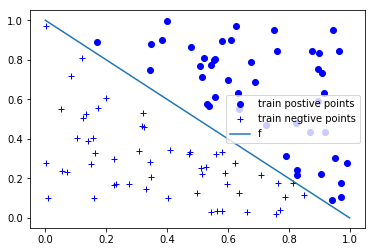

In [35]:
import matplotlib.pyplot as plt

plt.plot(postive_train_x[:, 1], postive_train_x[:,2], "bo", label="train postive points")
plt.plot(negtive_train_x[:, 1], negtive_train_x[:,2], "b+", label="train negtive points")
plt.plot([0, 1], [1, 0], label="f")
plt.legend()

In [36]:
test_x = np.random.rand(10000, 3)
test_x[:, 0] = 1

test_y = []
for i in range(len(test_x)):
    if (np.dot(wf, test_x[i]) > 0):
        test_y.append(1)
    else:
        test_y.append(-1)
test_y = np.asarray(test_y)
postive_test_x = np.asarray([test_x[i] for i in range(len(test_y)) if test_y[i] > 0])
negtive_test_x = np.asarray([test_x[i] for i in range(len(test_y)) if test_y[i] <= 0])

In [37]:
print("postive_test_x's shape is", postive_test_x.shape)
print("negtiva_test_x's shape is", negtive_test_x.shape)

postive_test_x's shape is (5014, 3)
negtiva_test_x's shape is (4986, 3)


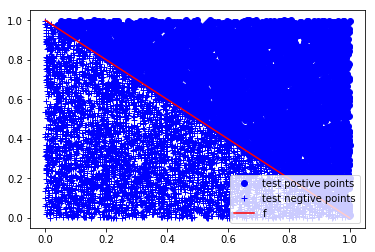

In [38]:
import matplotlib.pyplot as plt

plt.plot(postive_test_x[:, 1], postive_test_x[:,2], "bo", label="test postive points")
plt.plot(negtive_test_x[:, 1], negtive_test_x[:,2], "b+", label="test negtive points")
plt.plot([0, 1], [1, 0], 'red', label="f")
plt.legend()

In [141]:
def PLA_nd(x, y, n, eta, iteration):
    w = [0] * (n + 1)
    c = 0
    for i in np.random.randint(0, len(x), size=iteration):
        s = np.dot(w, x[i])
        if (s * y[i] <= 1):
            w += eta * (y[i] - s) * x[i]
            c += 1
        # 防止参数过大，double值在运算中溢出
        if (abs(w[0]) > 100):
            w /= 100
        if (c == iteration): break
    return w

In [142]:
def error_rate(w, x, y):
    error = 0.0
    for i in range(len(x)):
        if (y[i] * np.dot(w, x[i]) <= 0):
            error += 1
    return error / len(x)

In [143]:
print(train_x.shape)
print(train_y.shape)

(100, 3)
(100,)


In [150]:
# eta = 100
g = PLA_nd(train_x, train_y, 2, eta=100, iteration=1000)

error = error_rate(g, test_x, test_y)
print("test error rate is", error)

test error rate is 0.5014


In [145]:
g0 = -(g[0] + g[1] * 0) / g[2]
g1 = -(g[0] + g[1] * 1) / g[2]

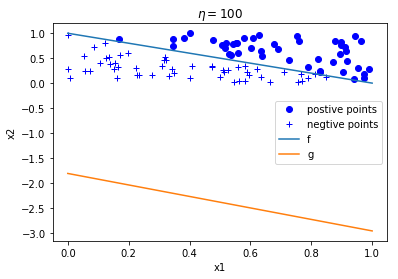

In [146]:
import matplotlib.pyplot as plt

plt.plot(postive_train_x[:, 1], postive_train_x[:,2], "bo", label="postive points")
plt.plot(negtive_train_x[:, 1], negtive_train_x[:,2], "b+", label="negtive points")
plt.plot([0, 1], [1, 0], label="f")
plt.plot([0, 1], [g0, g1], label="g")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("$\eta=100$")
plt.legend()

---

(b) Use the data set in (a) and redo everything with $\eta=1$.

test error rate is 0.0492


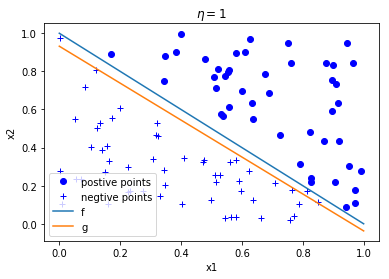

In [147]:
# eta = 1
g = PLA_nd(train_x, train_y, 2, eta=1, iteration=1000)
error = error_rate(g, test_x, test_y)
print("test error rate is", error)
g0 = -(g[0] + g[1] * 0) / g[2]
g1 = -(g[0] + g[1] * 1) / g[2]
plt.plot(postive_train_x[:, 1], postive_train_x[:,2], "bo", label="postive points")
plt.plot(negtive_train_x[:, 1], negtive_train_x[:,2], "b+", label="negtive points")
plt.plot([0, 1], [1, 0], label="f")
plt.plot([0, 1], [g0, g1], label="g")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("$\eta=1$")
plt.legend()

---

(c) Use the data set in (a) and redo everything with $\eta=0.01$.

test error rate is 0.0633


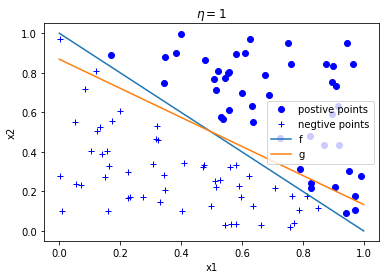

In [148]:
# eta = 0.01
g = PLA_nd(train_x, train_y, 2, eta=0.01, iteration=1000)
error = error_rate(g, test_x, test_y)
print("test error rate is", error)
g0 = -(g[0] + g[1] * 0) / g[2]
g1 = -(g[0] + g[1] * 1) / g[2]
plt.plot(postive_train_x[:, 1], postive_train_x[:,2], "bo", label="postive points")
plt.plot(negtive_train_x[:, 1], negtive_train_x[:,2], "b+", label="negtive points")
plt.plot([0, 1], [1, 0], label="f")
plt.plot([0, 1], [g0, g1], label="g")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("$\eta=1$")
plt.legend()

---

(d) Use the data set in (a) and redo everything with $\eta=0.0001$.

test error rate is 0.0399


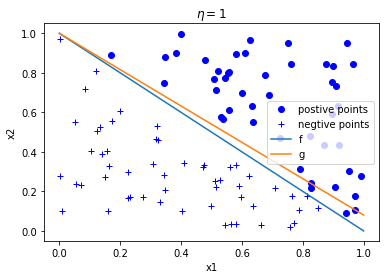

In [149]:
# eta = 0.0001
g = PLA_nd(train_x, train_y, 2, eta=0.01, iteration=1000)
error = error_rate(g, test_x, test_y)
print("test error rate is", error)
g0 = -(g[0] + g[1] * 0) / g[2]
g1 = -(g[0] + g[1] * 1) / g[2]
plt.plot(postive_train_x[:, 1], postive_train_x[:,2], "bo", label="postive points")
plt.plot(negtive_train_x[:, 1], negtive_train_x[:,2], "b+", label="negtive points")
plt.plot([0, 1], [1, 0], label="f")
plt.plot([0, 1], [g0, g1], label="g")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("$\eta=1$")
plt.legend()

---

(e)Compare the results that you get from (a) to (d)

In [154]:
for i in range(10):
    err_eta_100 = error_rate(PLA_nd(train_x, train_y, 2, eta=100, iteration=1000), test_x, test_y)
    err_eta_1 = error_rate(PLA_nd(train_x, train_y, 2, eta=1, iteration=1000), test_x, test_y)
    err_eta_001 = error_rate(PLA_nd(train_x, train_y, 2, eta=0.01, iteration=1000), test_x, test_y)
    err_eta_00001 = error_rate(PLA_nd(train_x, train_y, 2, eta=0.0001, iteration=1000), test_x, test_y)
    
print("eta = 100, 10 average error rate = ", err_eta_100 / 10)
print("eta = 1, 10 average error rate = ", err_eta_1 / 10)
print("eta = 0.01, 10 average error rate = ", err_eta_001 / 10)
print("eta = 0.0001, 10 average error rate = ", err_eta_00001 / 10)

eta = 100, 10 average error rate =  0.04986
eta = 1, 10 average error rate =  0.00375
eta = 0.01, 10 average error rate =  0.004569999999999999
eta = 0.0001, 10 average error rate =  0.02779


上面计算了10次$\eta$取不同值时，在测试机上得到的平均错误率。可以看出，随着$\eta$的上升，测试集上的错误率一开始下降，在$\eta=1$时最低，然后开始上升。

The algorithm above is a variant of the so called Adaline ($Adaptive Linear Neuron$) algorithm for
perceptron learning.

---

---

## Problem 1.6